# Supermarket Sales - Global Explanations
- Andrea Cohen
- 03.23.23

## Data:
- Original data source
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

## Data Dictionary:

Variable Name | Description
---| ---
Item_Identifier| Unique product ID
Item_Weight| Weight of product
Item_Fat_Content| Whether the product is low fat or regular
Item_Visibility| The percentage of total display area of all products in a store allocated to the particular product
Item_Type| The category to which the product belongs
Item_MRP| Maximum Retail Price (list price) of the product
Outlet_Identifier| Unique store ID
Outlet_Establishment_Year| The year in which store was established
Outlet_Size| The size of the store in terms of ground area covered
Outlet_Location_Type| The type of area in which the store is located
Outlet_Type| Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales| Sales of the product in the particular store. This is the target variable to be predicted.



## Preliminary steps

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
shap.initjs()
from lime.lime_tabular import LimeTabularExplainer

### Set the random state for reproducibility

In [2]:
SEED = 321
np.random.seed(SEED)

### Load the data

In [3]:
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'DecisionTreeRegressor'])

In [4]:
preprocessor = loaded_joblib['preprocessor']
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
LinearRegression = loaded_joblib['LinearRegression']
DecisionTreeRegressor = loaded_joblib['DecisionTreeRegressor']

## Explain the tree-based model with shap

### Create an X_shap and y_shap variable from the training data

In [5]:
# check the length of the X data
len(X_train)

6392

In [6]:
# sample a subset of the data
X_shap = shap.sample(X_train, nsamples = 500, random_state = 321)

In [7]:
# use the index of X_shap to slice out the corresponding y data 
y_shap = y_train.loc[X_shap.index]

### Create a model explainer

In [8]:
explainer = shap.Explainer(DecisionTreeRegressor)
explainer

### Calculate the shap values for the model

In [9]:
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(500, 35)

In [10]:
X_shap.shape

(500, 35)

- the shape of the shap values is the same as the X data

### Summary Plot - Bar

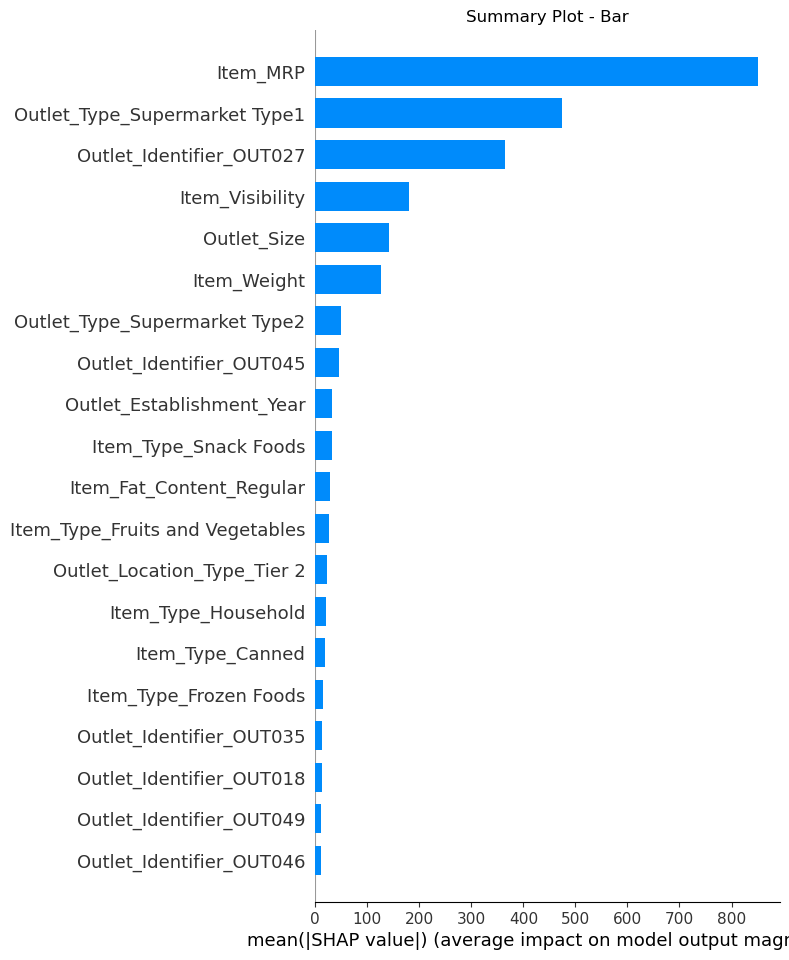

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show = False)
ax.set_title('Summary Plot - Bar');
fig.savefig('Images/Summary_Plot_Bar.png')

- The most important features according to SHAP are:
    - Item_MRP
    - Outlet_Type_Supermarket Type 1
    - Outlet_Identifier_OUT027
    - Item_Visibility
    - Outlet_Size
    

.![png](./Images/Top%2015%20Most%20Important%20Features.png)

- The most important features according to the model are:
    - Item_MRP
    - Item_Visibility
    - Outlet_Identifier_OUT027
    - Outlet_Type_Supermarket Type 1
    - Outlet_Size

- Both SHAP and the model used Item_MRP as the most important feature for separating the data to predict the item outlet sales.
- The next 4 most important features were the same for SHAP and for the model, but in different orders of importance.
    - SHAP used Outlet_Type_Supermarket Type 1 as the second most important feature, but the model used Item_Visibility as the second most important feature.
    - Both SHAP and the model used Outlet_Identifier_OUT027 as the third most important feature.
    - SHAP used Item_Visibility as the fourth most important feature, but the model used Outlet_Type_Supermarket Type 1 as the fourth most important feature.
    - Both SHAP and the model used Outlet_Size as the fifth most important feature.
- SHAP used Outlet_Type_Supermarket Type 1 as more important than Outlet_Size, but the model used Outlet_Size as more important than Outlet_Type_Supermarket Type 1.

### Summary Plot - dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


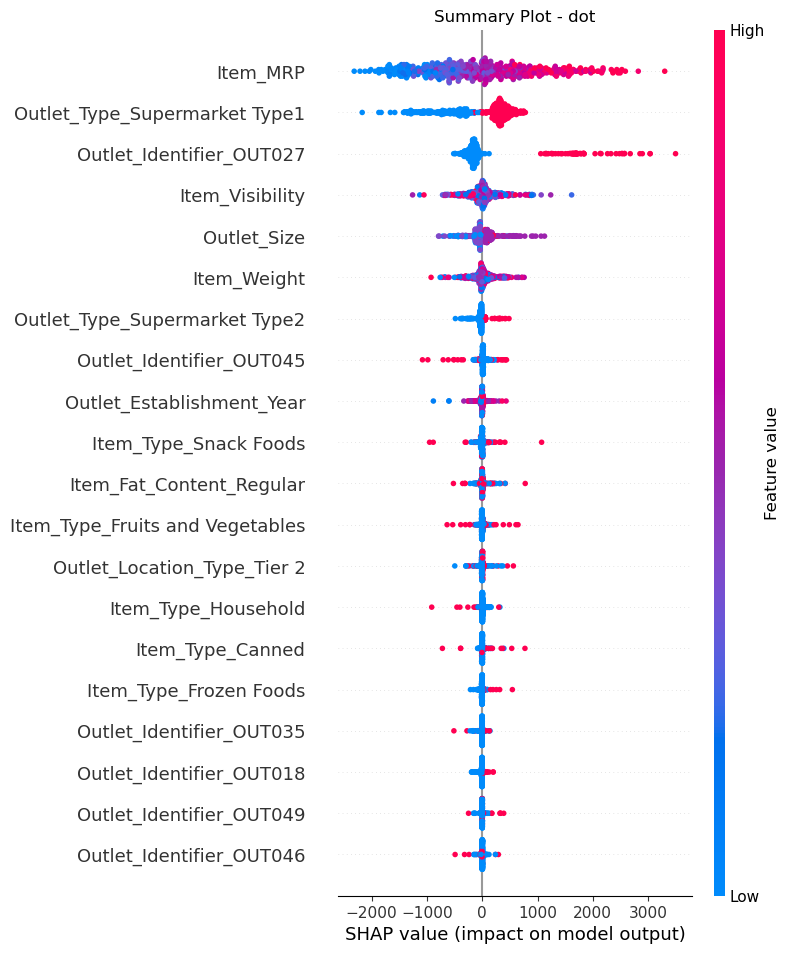

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show = False)
ax.set_title('Summary Plot - dot');
fig.savefig('Images/Summary_Plot_dot.png')

- The 3 most important features according to SHAP are Item_MRP, Outlet_Type_Supermarket Type 1, and  Outlet_Identifier_OUT027.
    - Item_MRP
        - The red values are on the right (positive).  The greater the maximum retail price of an item, the higher the model will predict as the item outlet sales.
        - The blue values are on the left (negative).  The smaller the maximum retail price of an item, the lower the model will predict as the item outlet sales.
    - Outlet_Type_Supermarket Type 1
        - The red values are on the right (positive).  If the item is sold at a Supermarket Type 1, the model will predict higher sales.
        - The blue values are on the left (negative).  If the item is sold at a different outlet type, the model will predict lower sales.
    - Outlet_Identifier_OUT027
        - The red values are on the right (positive).  If the item is sold at Outlet OUT027, the model will predict higher sales.
        - The blue values are on the left (negative).  If the item is sold at any other outlet, the model will predict lower sales.
        
        

## Local Explanations

In [13]:
# set a new index to match shap values
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

### Item_MRP


- The maximum retail price of an item was the most important feature for both SHAP and the model.  It would be helpful to choose an item with low MRP and an item with high MRP.

#### Highest maximum retail price

In [14]:
# select the row with highest maximum retail price
index_max_mrp = X_shap_local['Item_MRP'].idxmax()

In [15]:
# check the feature values for selected example
X_shap_local.iloc[index_max_mrp]

Item_Weight                          10.000000
Item_Visibility                       0.025932
Item_MRP                            264.722600
Outlet_Establishment_Year          2009.000000
Outlet_Size                           1.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      1.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identi

In [16]:
# what was the actual item outlet sale?
y_shap_local.iloc[index_max_mrp]

3171.8712

Lime tabular explanation

In [17]:
# Create a lime explainer with X_shap_local with regression as the mode
lime_explainer = LimeTabularExplainer(training_data = X_shap_local.values, feature_names = X_shap_local.columns, mode = 'regression')
lime_explainer

In [18]:
# Use the lime explainer to explain the maximum retail price
exp = lime_explainer.explain_instance(X_shap_local.loc[index_max_mrp], DecisionTreeRegressor.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


- This item had a predicted outlet sales value of 3171.87.
- This item had features associated with higher outlet sales:
    - Item_MRP = 264.72 (> 179.52)
    - Item_Type was not seafood or others
    - Outlet_Size was medium
    - Outlet_Identifier was not OUT018 or OUT045
- This item also had features associated with lower outlet sales:
    - Outlet_Identifier was not OUT027
    - Outlet_Type was not Supermarket Type 1
    - Item_type was not starchy food or breakfast
- 6 of the top 10 most impactful features were associated with higher outlet sales, and 4 were associated with lower outlet sales.

In [19]:
# get the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(), columns = ['Effect', 'Value'])
exp_df

Effect        Value
0       Outlet_Identifier_OUT027 <= 0.00 -1839.149514
1                      Item_MRP > 179.52  1824.847454
2  Outlet_Type_Supermarket Type1 <= 0.00 -1254.683180
3        Item_Type_Starchy Foods <= 0.00  -639.003535
4            Item_Type_Breakfast <= 0.00  -499.998140
5              Item_Type_Seafood <= 0.00   411.435110
6               Item_Type_Others <= 0.00   274.421502
7             0.76 < Outlet_Size <= 1.00   263.770155
8        Outlet_Identifier_OUT018 > 0.00   230.345705
9       Outlet_Identifier_OUT045 <= 0.00   206.753593

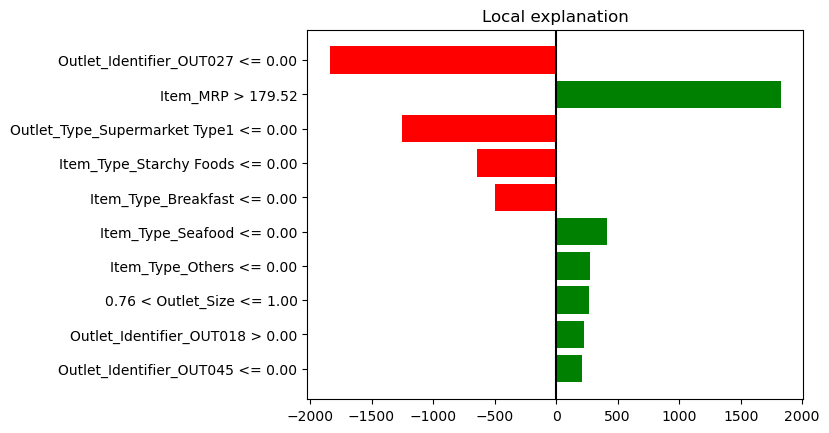

In [20]:
# get the explanation barplot as a matplotlib figure
fig = exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0, color = 'k');
fig.savefig('Images/Lime_Explanation_Highest_MRP.png')

Individual Force Plot

In [21]:
shap.force_plot(explainer.expected_value, shap_values = shap_values[index_max_mrp].values, features = X_shap_local.iloc[index_max_mrp])

- The base value is 2154.
- The SHAP value is 3171.87.
- The Item_MRP is the most important feature for this item, and it is pushing the prediction toward a higher value.  The Item_MRP for this item is 264.7.
- Outlet_Size and Item_Weight are also pushing the prediction toward a higher value.
- The Outlet_Type_Supermarket and the Item_Type_Frozen Foods are pushing the prediction toward a lower value.


#### Lowest maximum retail price

In [22]:
# select the row with the lowest maximum retail price
index_min_mrp = X_shap_local['Item_MRP'].idxmin()

In [23]:
# check the feature values for selected example
X_shap_local.iloc[index_min_mrp]

Item_Weight                          11.800000
Item_Visibility                       0.076657
Item_MRP                             32.355800
Outlet_Establishment_Year          1987.000000
Outlet_Size                           2.000000
Item_Fat_Content_Regular              1.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 1.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identi

In [24]:
# what was the actual item outlet sale?
y_shap_local.iloc[index_min_mrp]

169.779

Lime tabular explanation

In [25]:
# Create a lime explainer with X_shap_local with regression as the mode
lime_explainer = LimeTabularExplainer(training_data = X_shap_local.values, feature_names = X_shap_local.columns, mode = 'regression')
lime_explainer

In [26]:
# Use the lime explainer to explain the maximum retail price
exp = lime_explainer.explain_instance(X_shap_local.loc[index_min_mrp], DecisionTreeRegressor.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


- This item had a predicted outlet sales value of 169.78.
- This item had features associated with lower outlet sales:
    - Outlet_Identifier was not OUT027 
    - Item_MRP = 32.36 (< 90.08)
    - Item_Type was not soft drink or breakfast
- This item also had features associated with higher outlet sales:
    - Outlet_Type was Supermarket Type 1
    - Item_Type was not seafood, breads, health and hygiene, or hard drinks
    - Outlet_Size was high
- 6 of the top 10 most impactful features were associated with higher outlet sales, and 4 were associated with lower outlet sales.

In [27]:
# get the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(), columns = ['Effect', 'Value'])
exp_df

Effect        Value
0              Outlet_Identifier_OUT027 <= 0.00 -1738.115265
1                             Item_MRP <= 90.08 -1582.962571
2  0.00 < Outlet_Type_Supermarket Type1 <= 1.00  1296.266540
3                 Item_Type_Soft Drinks <= 0.00  -340.809309
4                     Item_Type_Seafood <= 0.00   304.834367
5                      Item_Type_Breads <= 0.00   278.825369
6          Item_Type_Health and Hygiene <= 0.00   211.327695
7                            Outlet_Size > 1.00   207.534254
8                 Item_Type_Hard Drinks <= 0.00   178.303759
9                   Item_Type_Breakfast <= 0.00  -132.862772

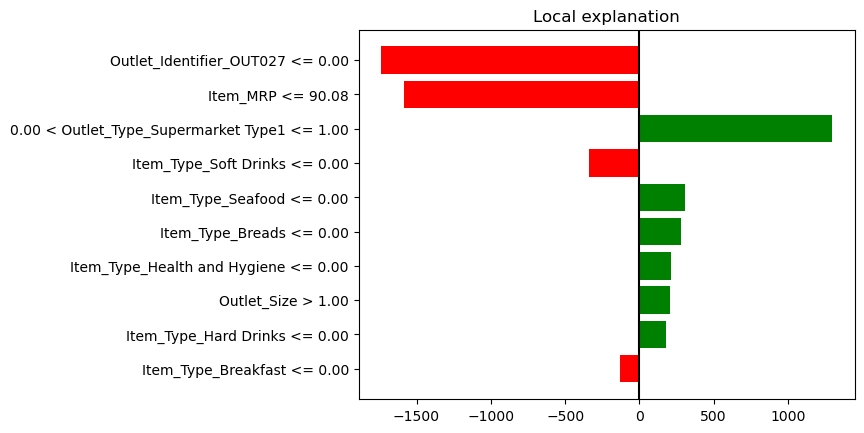

In [28]:
# get the explanation barplot as a matplotlib figure
fig = exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0, color = 'k');
fig.savefig('Images/Lime_Explanation_Lowest_MRP.png')

Individual Force Plot

In [29]:
shap.force_plot(explainer.expected_value, shap_values = shap_values[index_min_mrp].values, features = X_shap_local.iloc[index_min_mrp])

- The base value is 2154.
- The SHAP value is 169.78.
- The Item_MRP is the most important feature for this item, and it is pushing the prediction toward a lower value. The Item_MRP for this item is 32.36.
- Outlet_Identifier_OUT027 is also pushing the prediction toward a lower value.
- The Outlet_Type_Supermarket Type 1 is pushing the prediction toward a higher value.

### Outlet_Type_Supermarket Type 1

- The type of outlet was among the most important features for both SHAP and the model.  It would be helpful to choose an example from a Type 1 Supermarket.

In [30]:
# select a row with the Outlet_Type_Supermarket Type 1
filter_supermarket_type1 = X_shap_local['Outlet_Type_Supermarket Type1'] == 1.0
index_examples_supermarket_type1 = X_shap_local[filter_supermarket_type1].index
index_group_supermarket_type1 = np.random.choice(index_examples_supermarket_type1)
example_supermarket_type1 = X_shap_local.loc[index_group_supermarket_type1]

In [31]:
# check the feature values for selected example
example_supermarket_type1

Item_Weight                           9.195000
Item_Visibility                       0.117485
Item_MRP                            158.557800
Outlet_Establishment_Year          1997.000000
Outlet_Size                           0.000000
Item_Fat_Content_Regular              1.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 1.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Identi

#### Lime tabular explanation

In [32]:
# Create a lime explainer with X_shap_local with regression as the mode
lime_explainer = LimeTabularExplainer(training_data = X_shap_local.values, feature_names = X_shap_local.columns, mode = 'regression')
lime_explainer

In [33]:
# Use the lime explainer to explain the example
exp = lime_explainer.explain_instance(X_shap_local.loc[354], DecisionTreeRegressor.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


- This item had a predicted outlet sales value of 2451.48.
- This item had features associated with lower outlet sales:
    - Outlet_Identifier was not OUT027
    - Outlet_Size was small
    - Item_Type was not other, meat, bread, or seafood
- This item also had features associated with higher outlet sales:
    - Outlet_Type was Supermarket Type 1
    - Item_MRP was 175.51 (> 140.43)
    - Item_Type was not starchy foods
    - Outlet_Identifier was not OUT019
- 4 of the top 10 most impactful features were associated with higher outlet sales, and 6 were associated with lower outlet sales.

In [34]:
# get the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(), columns = ['Effect', 'Value'])
exp_df

Effect        Value
0              Outlet_Identifier_OUT027 <= 0.00 -1824.130892
1  0.00 < Outlet_Type_Supermarket Type1 <= 1.00  1300.426970
2                   140.43 < Item_MRP <= 179.52   419.176828
3                           Outlet_Size <= 0.76  -326.500372
4                      Item_Type_Others <= 0.00  -211.731125
5                        Item_Type_Meat <= 0.00  -210.025239
6                      Item_Type_Breads <= 0.00  -174.934096
7               Item_Type_Starchy Foods <= 0.00   166.507639
8              Outlet_Identifier_OUT019 <= 0.00   145.677307
9                     Item_Type_Seafood <= 0.00  -137.674095

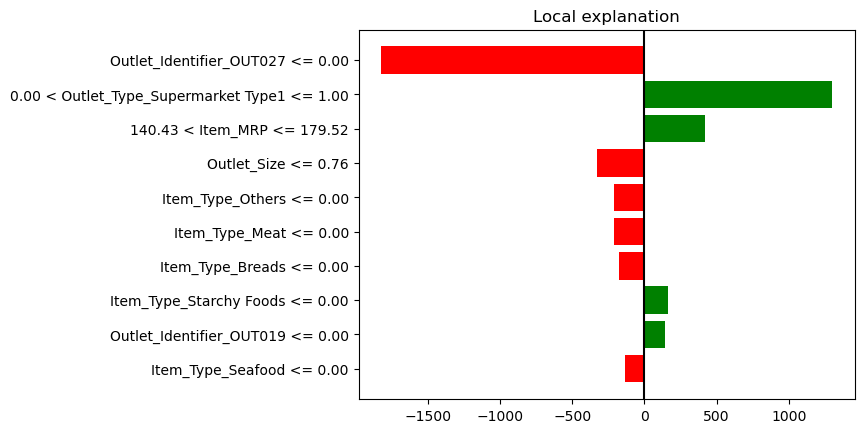

In [35]:
# get the explanation barplot as a matplotlib figure
fig = exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0, color = 'k');
fig.savefig('Images/Lime_Explanation_Supermarket_Type1.png')

#### Individual Force Plot

In [36]:
shap.force_plot(explainer.expected_value, shap_values = shap_values[354].values, features = X_shap.iloc[354])

- The base value is 2154.
- The SHAP value is 2451.48.
- The Outlet_Type_Supermarket Type1 is the most important feature for this item, and it is pushing the prediction toward a higher value.  The item is sold at a Supermarket Type1.
- Item_MRP are Item_Typer_Fruits and Vegetables are also pushing the prediction toward a higher value.
- The Outlet_Establishment_Year and the Outlet_Identifier are pushing the prediction toward a lower value.